In [5]:
import numpy as np
import pandas as pd

df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00
mean,2135.00,2.50,5059123.92,15133450.46,10.90,599.94,7472616.54,4973155.31,15126305.93,4976692.43
std,1232.50,1.70,2806839.83,9043362.98,5.71,172.43,6503636.59,4388966.09,9103753.67,3250185.31
min,1.00,0.00,200000.00,300000.00,2.00,300.00,-100000.00,0.00,300000.00,0.00
25%,1068.00,1.00,2700000.00,7700000.00,6.00,453.00,2200000.00,1300000.00,7500000.00,2300000.00
50%,2135.00,3.00,5100000.00,14500000.00,10.00,600.00,5600000.00,3700000.00,14600000.00,4600000.00
75%,3202.00,4.00,7500000.00,21500000.00,16.00,748.00,11300000.00,7600000.00,21700000.00,7100000.00
max,4269.00,5.00,9900000.00,39500000.00,20.00,900.00,29100000.00,19400000.00,39200000.00,14700000.00


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

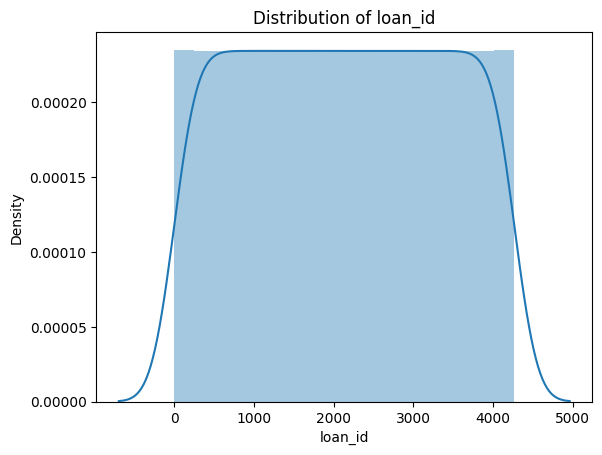

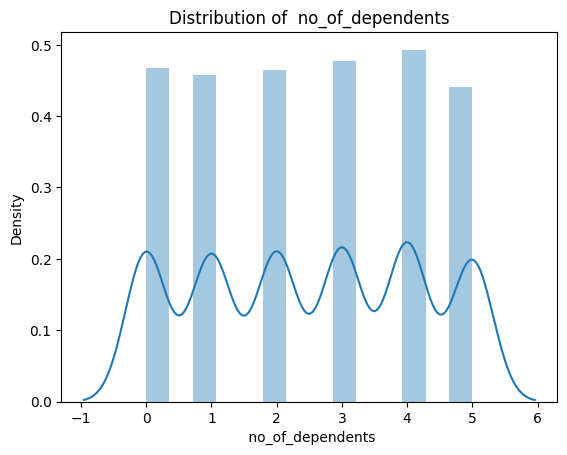

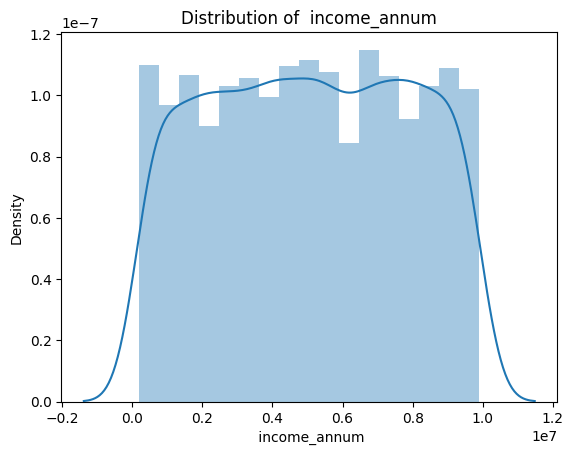

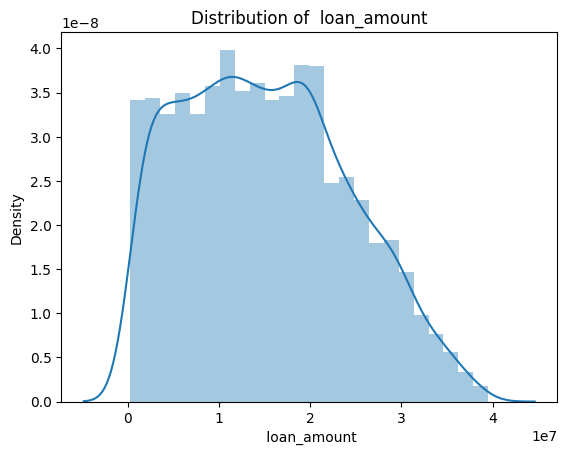

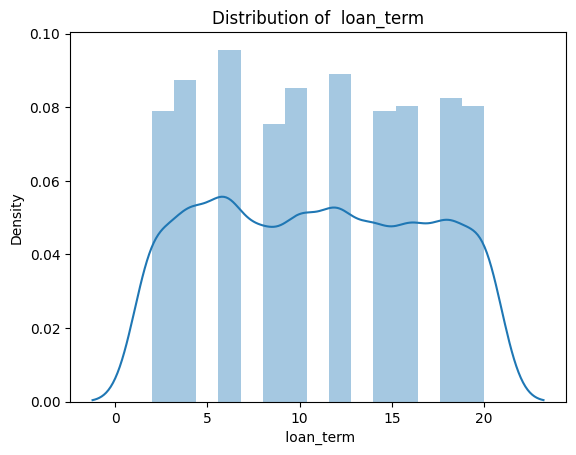

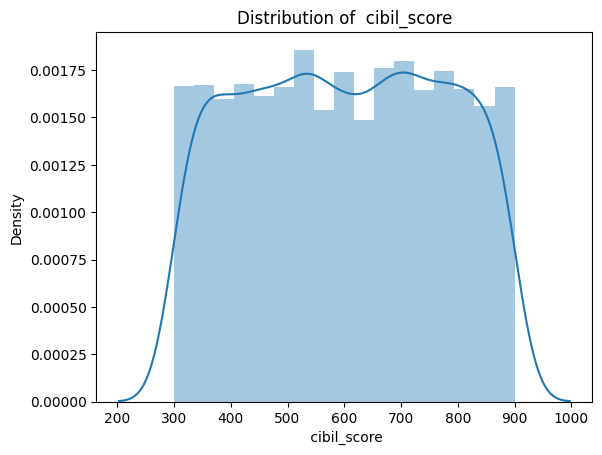

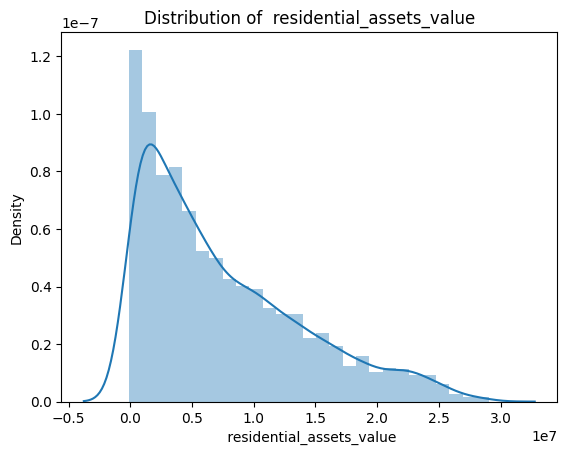

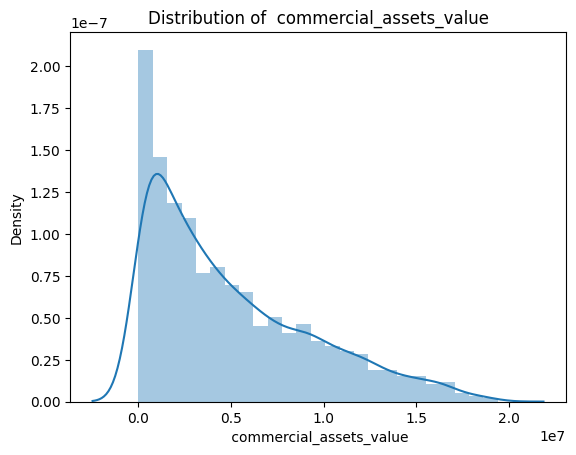

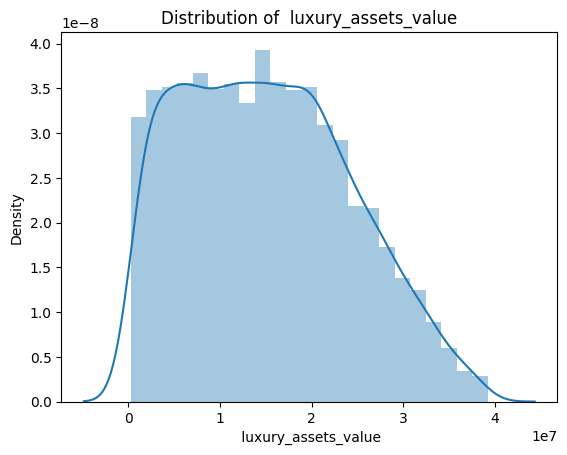

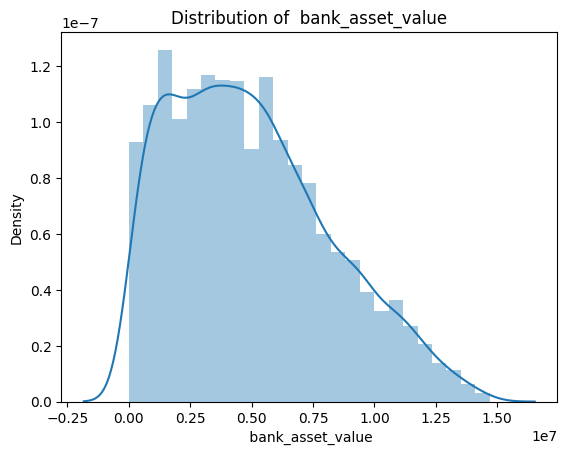

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create individual subplots for each numeric column
for col in numeric_cols:
    plt.figure()
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.show()


In [16]:
from sklearn.preprocessing import OrdinalEncoder
#แปลง education
list_edu=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[list_edu])
df[' education'] = oe.fit_transform(df[[' education']])

#แปลง self_employed
oe = OrdinalEncoder()
df[' self_employed'] = oe.fit_transform(df[[' self_employed']])

#แปลง loan status
list_loan=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[list_loan])
df[' loan_status'] = oe.fit_transform(df[[' loan_status']])

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.00,0.00,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.00
1,2,0,0.00,1.00,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.00
2,3,3,1.00,0.00,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.00
3,4,3,1.00,0.00,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.00
4,5,5,0.00,1.00,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.00


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_df=scaler.fit_transform(df)
new_df_scaled = pd.DataFrame(new_df, columns=df.columns)
new_df_scaled.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.73,-0.29,1.00,-1.01,1.62,1.63,0.19,1.03,-0.78,2.88,0.83,0.93,0.78
1,-1.73,-1.47,-1.00,0.99,-0.34,-0.32,-0.51,-1.06,-0.73,-0.63,-0.69,-0.52,-1.28
2,-1.73,0.30,1.00,-1.01,1.44,1.61,1.59,-0.54,-0.06,-0.11,2.00,2.41,-1.28
3,-1.73,0.30,1.00,-1.01,1.12,1.72,-0.51,-0.77,1.65,-0.38,0.90,0.90,-1.28
4,-1.73,1.48,-1.00,0.99,1.69,1.00,1.59,-1.26,0.76,0.74,1.57,0.01,-1.28


In [21]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.00,0.00,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.00
1,2,0,0.00,1.00,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.00
2,3,3,1.00,0.00,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.00
3,4,3,1.00,0.00,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.00
4,5,5,0.00,1.00,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.00


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop([' loan_status'],axis=1)
y=df[' loan_status']
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [34]:
print(f"Data training = {len(X_train)}")
print(f"Data testing = {len(X_test)}")

Data training = 3415
Data testing = 854
